# Chapter 2: Selection Sort

- You learn about arrays and linked lists—two of the most basic data structures. They’re used absolutely everywhere. You already used arrays in chapter 1, and you’ll use them in almost every chapter in this book. Arrays are a crucial topic, so pay attention! But sometimes it’s better to use a linked list instead of an array. This chapter explains the pros and cons of both so you can decide which one is right for your algorithm.
- You learn your first sorting algorithm. A lot of algorithms only work if your data is sorted. Remember binary search? You can run binary search only on a sorted list of elements. This chapter teaches you selection sort. Most languages have a sorting algorithm built in, so you’ll rarely need to write your own version from scratch. But selection sort is a stepping stone to quicksort, which I’ll cover in the next chapter. Quicksort is an important algorithm, and it will be easier to understand if you know one sorting algorithm already.

## Arrays and linked lists

### Linked Lists

With linked lists, your items can be anywhere in memory. Each item stores the address of the next item in the list. A bunch of random memory addresses are linked together.

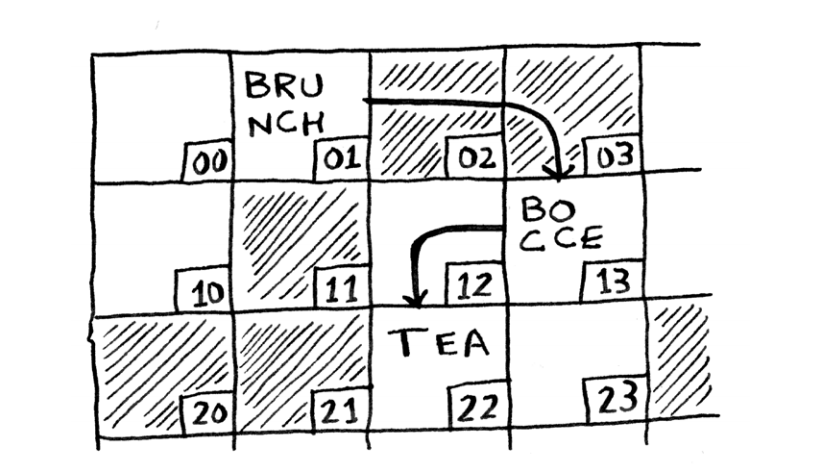

It’s like a treasure hunt. You go to the first address, and it says, “The next item can be found at address 123.” So you go to address 123, and it says, “The next item can be found at address 847,” and so on. Adding an item to a linked list is easy: you stick it anywhere in memory and store the address with the previous item.

### Arrays

You know the address for every item in your array. For example, suppose your array contains five items, and you know it starts at address 00. What is the address of item #5?

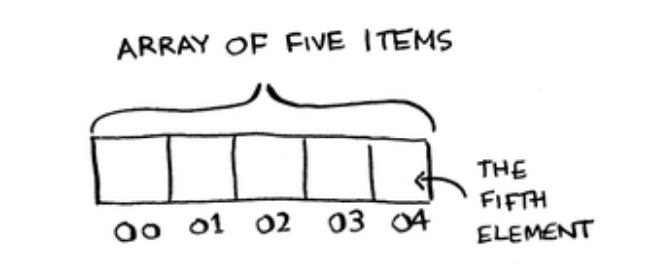

Simple math tells you: it’s 04. Arrays are great if you want to read random elements, because you can look up any element in  our array instantly. 

### Terminology

Here are the run times for common operations on arrays and lists.

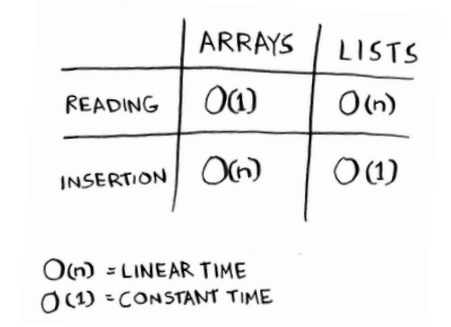

### Exercises

#### 2.1  Suppose you’re building an app to keep track of your finances. Every day, you write down everything you spent money on. At the end of the month, you review your expenses and sum up how much you spent. So, you have lots of inserts and a few reads. Should you use an array or a list?

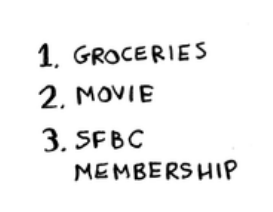

**Answer**
In this case, you’re adding expenses to the list every day and reading all the expenses once a month. Arrays have fast reads and slow inserts. Linked lists have slow reads and fast inserts. Because you’ll be inserting more often than reading, it makes sense to use a linked list. Also, linked lists have slow reads only if you’re accessing random elements in the list. Because you’re reading every element in the list, linked lists will do well on reads too. So a linked list is a good solution to this problem.

### Inserting into the middle of a list

What’s better if you want to insert elements in the middle: arrays or lists? With lists, it’s as easy as changing what the previous element points to.

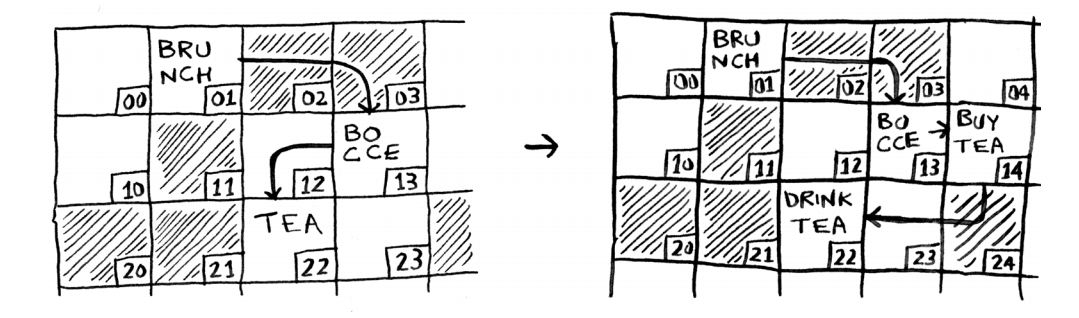

But for arrays, you have to shift all the rest of the elements down.

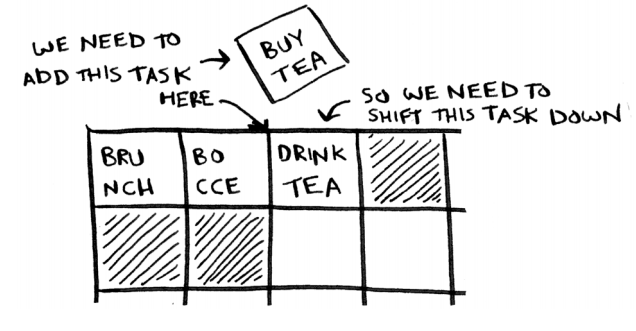

And if there’s no space, you might have to copy everything to a new
location! Lists are better if you want to insert elements into the middle.

### Deletions

What if you want to delete an element? Again, lists are better, because you just need to change what the previous element points to. With arrays, everything needs to be moved up when you delete an element.
Unlike insertions, deletions will always work. Insertions can fail sometimes when there’s no space left in memory. But you can always delete an element.

### Usage

Here are the run times for common operations on arrays and linked lists.

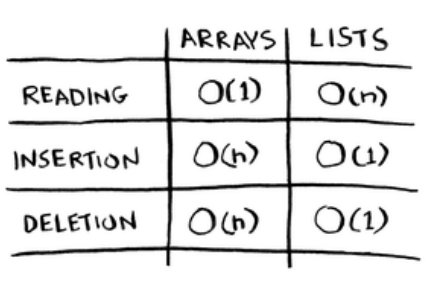

It’s worth mentioning that insertions and deletions are O(1) time only if you can instantly access the element to be deleted. It’s a common practice to keep track of the first and last items in a linked list, so it would take only O(1) time to delete those.
Which are used more: arrays or lists? Obviously, it depends on the use case. But arrays see a lot of use because they allow random access. There are two different types of access: random access and sequential access.
Sequential access means reading the elements one by one, starting at the first element. Linked lists can only do sequential access. If you want to read the 10th element of a linked list, you have to read the first 9 elements and follow the links to the 10th element. Random access means you can jump directly to the 10th element. You’ll frequently hear me say that arrays are faster at reads. This is because they provide random access. A lot of use cases require random access, so arrays are used a lot. Arrays and lists are used to implement other data structures, too (coming up later in the book).

### Exercises

#### 2.2 Suppose you’re building an app for restaurants to take customer orders. Your app needs to store a list of orders. Servers keep adding orders to this list, and chefs take orders off the list and make them. It’s an order queue: servers add orders to the back of the queue, and the chef takes the first order off the queue and cooks it. Would you use an array or a linked list to implement this queue? (Hint: Linked lists are good for inserts/deletes, and arrays are good for random access. Which one are you going to be doing here?)

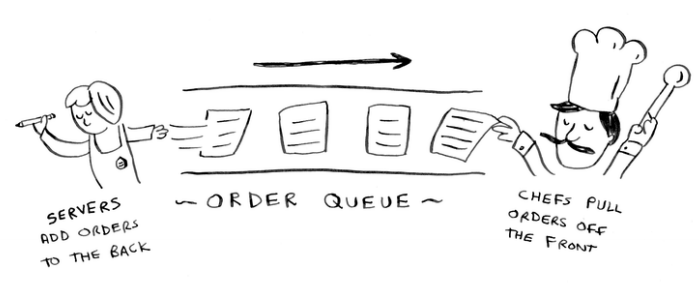

**Answer**
A linked list. Lots of inserts are happening (servers adding orders), which linked lists excel at. You don’t need search or random access (what arrays excel at), because the chefs always take the first order off the queue.

#### 2.3 Let’s run a thought experiment. Suppose Facebook keeps a list of usernames. When someone tries to log in to Facebook, a search is done for their username. If their name is in the list of usernames, they can log in. People log in to Facebook pretty often, so there are a lot of searches through this list of usernames. Suppose Facebook uses binary search to search the list. Binary search needs randomccess—you need to be able to get to the middle of the list of usernames instantly. Knowing this, would you implement the list as an array or a linked list?

**Answer**
A sorted array. Arrays give you random access—you can get an element from the middle of the array instantly. You can’t do that with linked lists. To get to the middle element in a linked list, you’d have to start at the first element and follow all the links down to the middle element.

#### 2.4 People sign up for Facebook pretty often, too. Suppose you decided to use an array to store the list of users. What are the downsides of an array for inserts? In particular, suppose you’re using binary search to search for logins. What happens when you add new users to an array?

**Answer**
Inserting into arrays is slow. Also, if you’re using binary search to search for usernames, the array needs to be sorted. Suppose someone named Adit B signs up for Facebook. Their name will be inserted at the end of the array. So you need to sort the array every time a name is inserted!

#### 2.5 In reality, Facebook uses neither an array nor a linked list to store user information. Let’s consider a hybrid data structure: an array of linked lists. You have an array with 26 slots. Each slot points to a linked list. For example, the first slot in the array points to a linked list containing all the usernames starting with a. The second slot points to a linked list containing all the usernames starting with b, and so on.

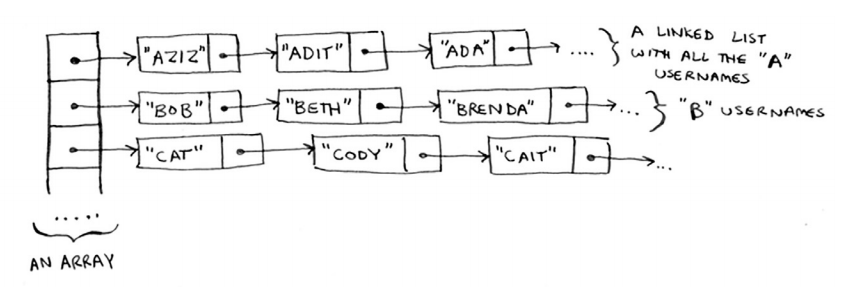

Suppose Adit B signs up for Facebook, and you want to add them to the list. You go to slot 1 in the array, go to the linked list for slot 1, and add Adit B at the end. Now, suppose you want to search for Zakhir H. You go to slot 26, which points to a linked list of all the Z names. Then you search through that list to find Zakhir H.
Compare this hybrid data structure to arrays and linked lists. Is it slower or faster than each for searching and inserting? You don’t have to give Big O run times, just whether the new data structure would be faster or slower.

**Answer**
Searching—slower than arrays, faster than linked lists.
Inserting—faster than arrays, same amount of time as linked lists.
So it’s slower for searching than an array, but faster or the same as linked lists for everything. We’ll talk about another hybrid data structure called a hash table later in the book. This should give you an idea of how you can build up more complex data structures from simple ones.
So what does Facebook really use? It probably uses a dozen different databases, with different data structures behind them: hash tables, B-trees, and others. Arrays and linked lists are the building blocks for these more complex data structures.

## Selection Sort

### Algorithm

Suppose you have a bunch of music on your computer. For each artist, you have a play count.

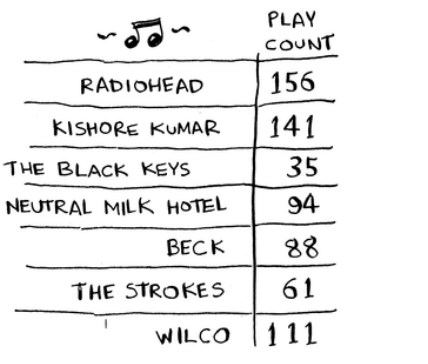

You want to sort this list from most to least played, so that you can rank your favorite artists. How can you do it?
One way is to go through the list and find the most-played artist. Addthat artist to a new list.

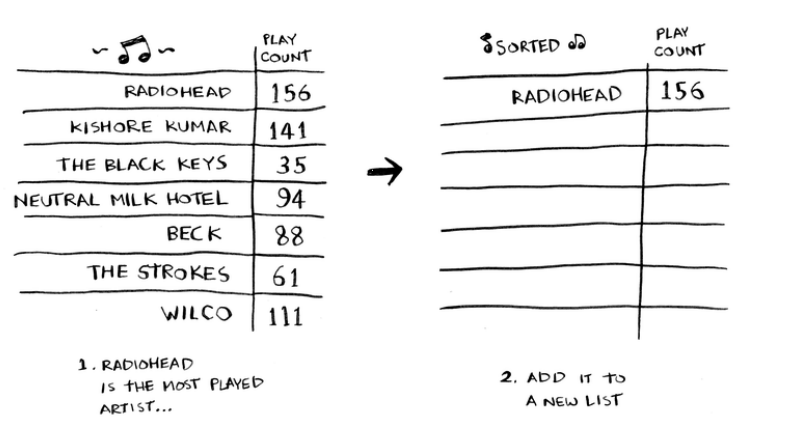

Do it again to find the next-most-played artist.

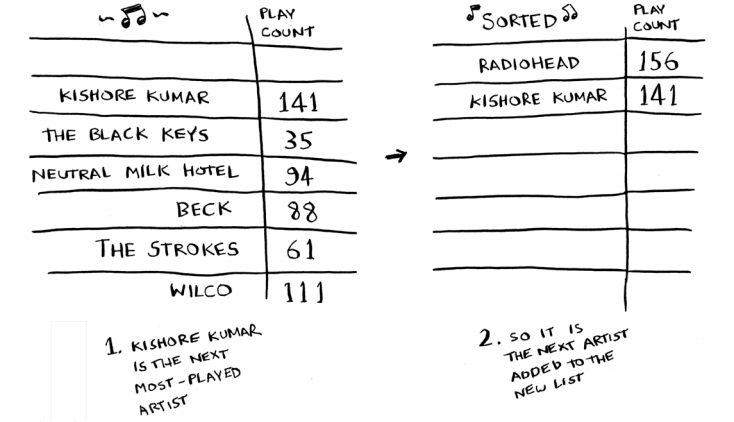

Keep doing this, and you’ll end up with a sorted list.

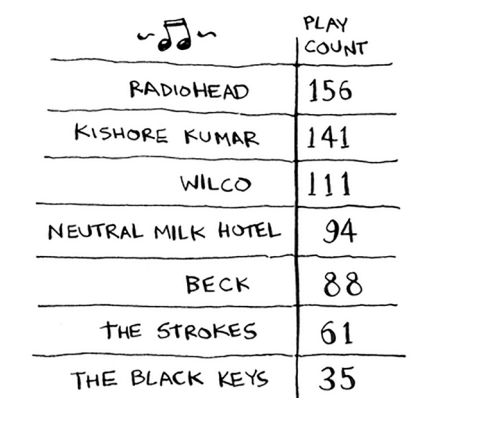

### Running Time

Remember that O(n) time means you touch every element in a list once. For example, running simple search over the list of artists means looking at each artist once.

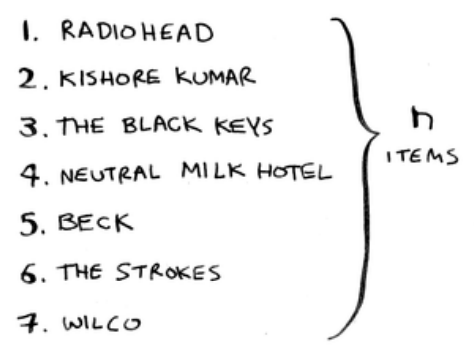

To find the artist with the highest play count, you have to check each item in the list. This takes O(n) time, as you just saw. So you have an operation that takes O(n) time, and you have to do that n times:

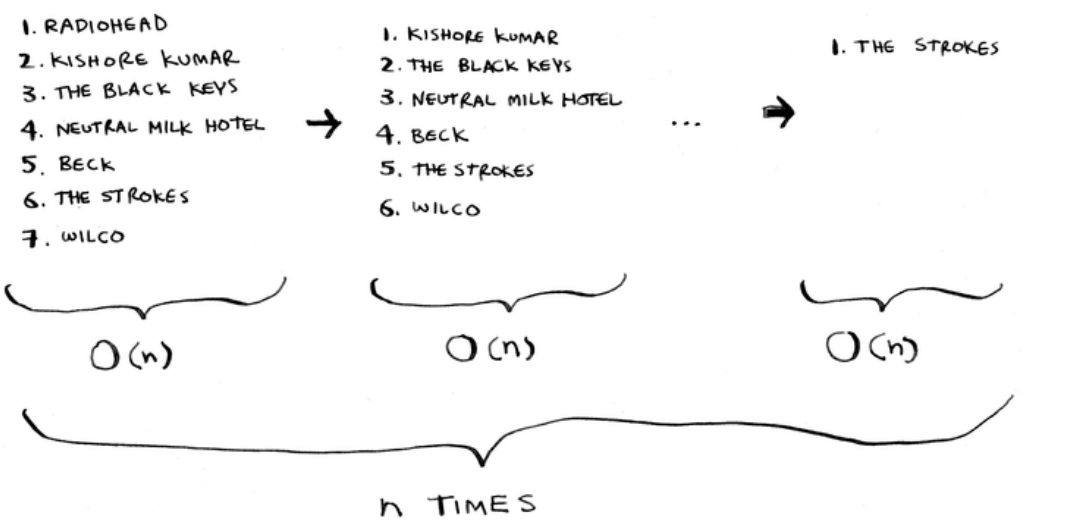

This takes O(n × n) time or O(n2) time.
Sorting algorithms are very useful. Now you can sort
- Names in a phone book
- Travel dates
- Emails (newest to oldest)

### Example Code Listing

We didn’t show you the code to sort the music list, but following is some code that will do something very similar: sort an array from smallest to largest. Let’s write a function to find the smallest element in an array:

In [2]:
def findSmallest(arr):
    smallest = arr[0]
    smallest_index = 0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

Now you can use this function to write selection sort:

In [4]:
def selectionSort(arr):
    newArr = []
    for i in range(len(arr)):
        smallest = findSmallest(arr)
        newArr.append(arr.pop(smallest))
    return newArr

In [5]:
# Test
print(selectionSort([5, 3, 6, 2, 10]))

[2, 3, 5, 6, 10]


## Recap

- Your computer’s memory is like a giant set of drawers.
- When you want to store multiple elements, use an array or a list.
- With an array, all your elements are stored right next to each other.
- With a list, elements are strewn all over, and one element stores the address of the next one.
- Arrays allow fast reads.
- Linked lists allow fast inserts and deletes.
- All elements in the array should be the same type (all ints, all doubles, and so on).